# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [39]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [40]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [41]:
# Write your code here
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")





The DataFrame has 1898 rows and 9 columns.


#### Observations:
Using df.shape allows you to extract the integer value of the total rows and columns in your datasets because it is used to find the size of a DataFrame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   The print shows a comphrehsive summary of the the DataFrame, columns in the dataset, and their respective data types


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [43]:
# Write your code here
missing_values_count = df.rating.isna().sum()
print(missing_values_count)



0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [44]:
# Write your code here
print("the minimum food prep time is",df.food_preparation_time.min())


the minimum food prep time is 20


In [45]:
print("the average food prep time is",df.food_preparation_time.mean())

the average food prep time is 27.371970495258168


In [46]:
print("the maximum food prep time is",df.food_preparation_time.max())

the maximum food prep time is 35


#### Observations:
Here we can see using the max, mean, and min function in python as a way to quickly check the statistical summary of the data

### **Question 5:** How many orders are not rated? [1 mark]

In [38]:
# Write the code here
not_given_count = (rating == "Not given").sum()
print(not_given_count)

736


#### Observations:
This code allows us to calculate the total number of data entries labeled "not given" in the rating column.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

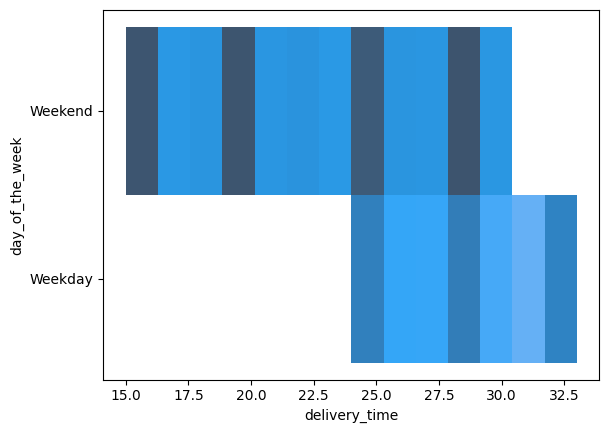

In [47]:
# Write the code here
sns.histplot(data=df, x="delivery_time", y="day_of_the_week")
plt.show()

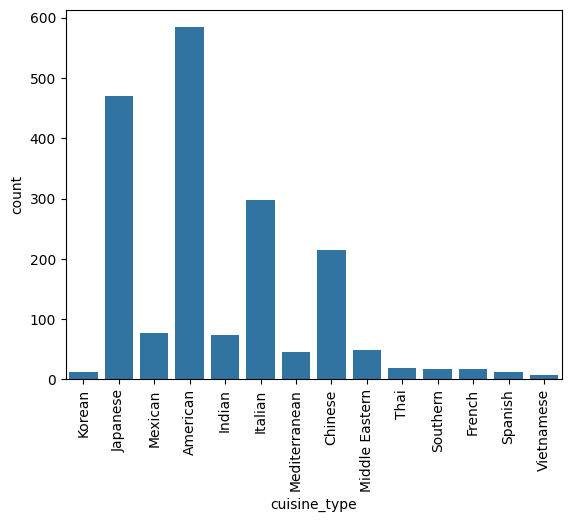

In [48]:
sns.countplot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

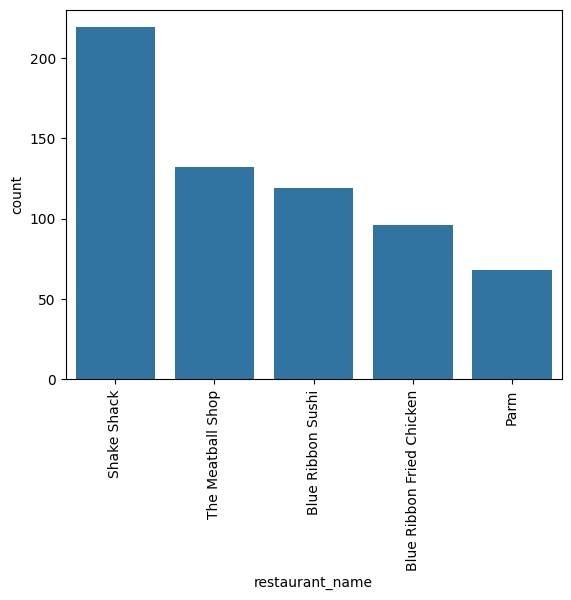

In [60]:
# Write the code here
restaurant_counts = df["restaurant_name"].value_counts()
top_5_restaurants = restaurant_counts.nlargest(5).index
filtered_df = df[df["restaurant_name"].isin(top_5_restaurants)]
sns.countplot(data=df, x="restaurant_name", order=top_5_restaurants)
plt.xticks(rotation=90)
plt.show()

#### Observations:

*   You can see that the "Shake Shack", an american cuisine, has the most orders from a restaurant than any other.

*   With american foods leading the way in total cuisine_type deliveries, it helps build supporting evidence of American foods being the most often bought cuisine_type








### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

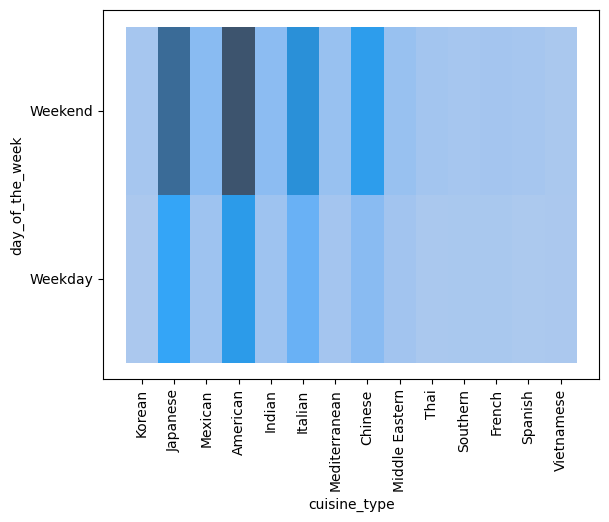

In [61]:
# Write the code here
sns.histplot(data=df, x="cuisine_type", y="day_of_the_week")
plt.xticks(rotation=90)
plt.show()

#### Observations:


*   We can see from the observed dataset that American
foods experience the highest volume of orders on the weekend




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [62]:
# Write the code here
orders_above_20 = df[df["cost_of_the_order"] > 20].cost_of_the_order.count()
total_orders = df.cost_of_the_order.count()
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"The percentage of orders costing more than $20 is {percentage_above_20:.2f}%")

The percentage of orders costing more than $20 is 29.24%


#### Observations:


*   This code gives you the ability to see what the total orders are above $20, and then dividing that by the total amount of orders in the "food hub" dataset, and multiplying that by 100





### **Question 10**: What is the mean order delivery time? [1 mark]

In [63]:
# Write the code here
df.delivery_time.mean()
print("the mean order delivery time is",df.delivery_time.mean())

the mean order delivery time is 24.161749209694417


#### Observations:


*   We can see here that the average mean order delivery is about 24 mins.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [64]:
# Write the code here
df.customer_id.value_counts()
top_3_customers = df["customer_id"].value_counts().nlargest(3)
filtered_df = df[df["customer_id"].isin(top_3_customers)]
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The three customer_id's listed buy the most frequently on "food hub"

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


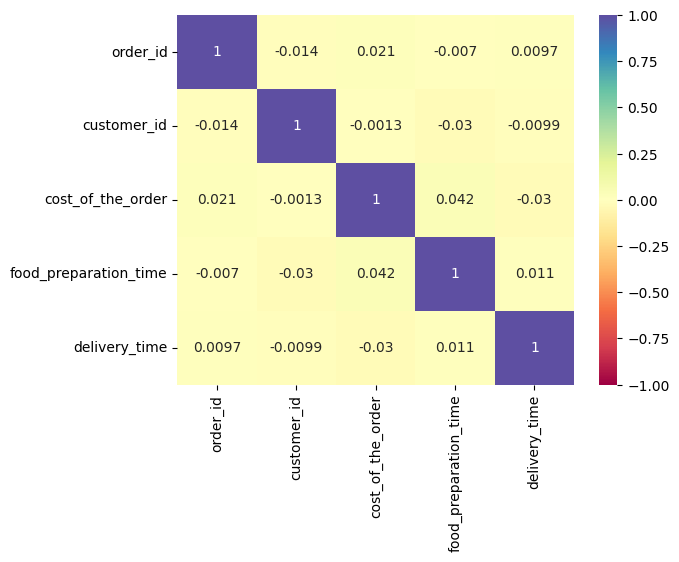

In [65]:
# Write the code here
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

<ipython-input-66-8990176c198d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "delivery_time", y = "rating", data = df, palette = 'PuBu')


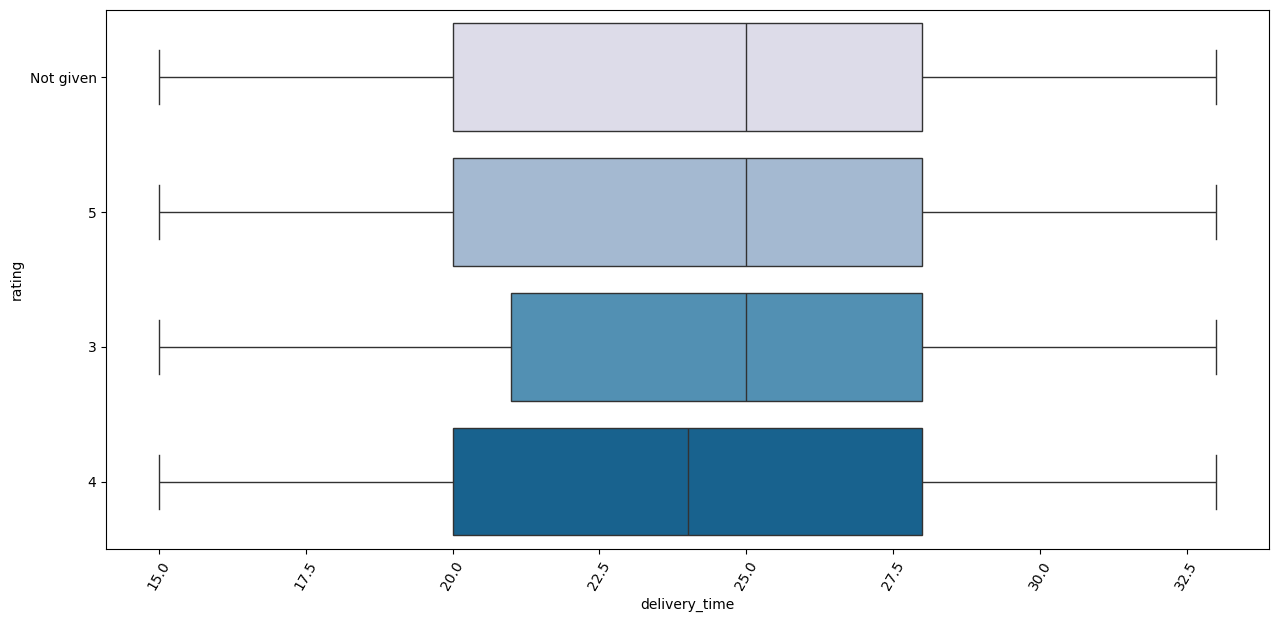

In [66]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "rating", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [12]:
# Write the code here
restaurant_ratings = df.groupby("restaurant_name")["rating"].df(["mean", "count"])
print(restaurant_ratings.head())
restaurant_ratings = df.groupby('restaurant_name')['rating'].df(['mean', 'count'])
promotional_offers = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
filtered_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
print(filtered_restaurants)

AttributeError: 'SeriesGroupBy' object has no attribute 'df'

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [67]:
# Write the code here
def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15
    else:
        return 0
df["revenue"] = df["cost_of_the_order"].apply(calculate_revenue)
print(df[["cost_of_the_order", "revenue"]])
total_revenue = df["revenue"].sum()
print(f"The total revenue generated by the company across all orders is ${total_revenue:.2f}")

      cost_of_the_order  revenue
0                 30.75   7.6875
1                 12.08   1.8120
2                 12.23   1.8345
3                 29.20   7.3000
4                 11.59   1.7385
...                 ...      ...
1893              22.31   5.5775
1894              12.18   1.8270
1895              25.22   6.3050
1896              12.18   1.8270
1897              19.45   2.9175

[1898 rows x 2 columns]
The total revenue generated by the company across all orders is $6166.30


#### Observations:


*   Here we can see using the def function allows us to define what we're wanting to extract from the data to calculate total revenue for the company.
*   Used IF/Else statements to define our parameters on what % of revenue is collected by the company depended on cost of each order.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [5]:
# Write the code here
time_to_prepare = df["food_preparation_time"].sum()
time_to_deliver = df["delivery_time"].sum()
total_time = time_to_prepare + time_to_deliver
print(f"The total time required to deliver the food is {total_time} minutes.")
delivery_time_above_60 = df[df["delivery_time"] > 60].delivery_time.count()
total_orders = df.delivery_time.count()+ df.food_preparation_time.count()
percentage_above_60 = (delivery_time_above_60 / total_orders) * 100
print(f"The percentage of orders taking more than 60 minutes to get delivered is {percentage_above_60:.2f}%")

The total time required to deliver the food is 97811 minutes.
The percentage of orders taking more than 60 minutes to get delivered is 0.00%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [68]:
# Write the code here
df.groupby("day_of_the_week")["delivery_time"].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
You can see that after using the groupby function in python, I was able to find the total mean of delivery times for weekends and weeekdays.


*   You can see that after using the groupby function in python, I was able to find the total mean of delivery times for weekends and weeekdays.

*   Weekdays have approximately a 24% gap in total delivery time compared to average delivery time on weekend's .






### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  I believe American foods were the customers favtorite because from our data visulization tools we were able to make inference on American food having more flexible pricing than the other cuisine types.


*   You can infer from one of my visuals on cuisine type vs ratings that southern food has the lowest average ratings than the other cuisines, but also one of your more expensive cuisines, and so you could create an hypothesis stating if customers are more hard on how they view their satisfaction with the Southern cuisine compared to the others, or is the customer service and food quality really that bad.



*  Was able to draw insight on what cuisine types saw consistent high volume on weekends compared to the others, as well.




### Recommendations:

*  

---